<a href="https://colab.research.google.com/github/Suyoung-Min/Pytorch-Tutorial/blob/main/Tutorial/SoftmaxMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()

device = torch.device("cuda" if USE_CUDA else "cpu")

print("device: ",device)

device:  cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [6]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [8]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [10]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:

    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()

    hypothesis = linear(X)
    cost = criterion(hypothesis,Y)

    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 0007 cost = 0.196344122
Epoch: 0007 cost = 0.197099105
Epoch: 0007 cost = 0.197444350
Epoch: 0007 cost = 0.197964415
Epoch: 0007 cost = 0.198700830
Epoch: 0007 cost = 0.199136004
Epoch: 0007 cost = 0.199543104
Epoch: 0007 cost = 0.199994549
Epoch: 0007 cost = 0.200405329
Epoch: 0007 cost = 0.200857058
Epoch: 0007 cost = 0.201197535
Epoch: 0007 cost = 0.201573521
Epoch: 0007 cost = 0.202099726
Epoch: 0007 cost = 0.202595755
Epoch: 0007 cost = 0.203179196
Epoch: 0007 cost = 0.203674197
Epoch: 0007 cost = 0.204320014
Epoch: 0007 cost = 0.204723850
Epoch: 0007 cost = 0.205073893
Epoch: 0007 cost = 0.205670640
Epoch: 0007 cost = 0.206163749
Epoch: 0007 cost = 0.206618935
Epoch: 0007 cost = 0.207113594
Epoch: 0007 cost = 0.207574338
Epoch: 0007 cost = 0.208098024
Epoch: 0007 cost = 0.208365232
Epoch: 0007 cost = 0.208958030
Epoch: 0007 cost = 0.209501073
Epoch: 0007 cost = 0.209968790
Epoch: 0007 cost = 0.210661724
Epoch: 0007 cost = 0.210963190
Epo

Accuracy: 0.8883000016212463
Label:  2
Prediction:  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


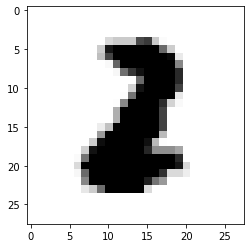

In [26]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()